In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def EM_step(t, X, f, g, dt, rootdt):
    """
    INPUT:
        t : time (scalar)
        X : (n,) array
        f : function from RxR to R (drift term) (f(t, x))
        g : function from RxR to R (diffusion term) (g(t, x))

    OUTPUT:
        X(t+dt)
    """
    return X + dt*f(t, X) + rootdt*np.random.standard_normal(len(X))*g(t, X)


def f(t, x, lam=0.75):
    return -lam*x

def g(t, x, sig=1):
    return sig

N = int(1e7)

lam=0.75
sig=1
dt = 0.5
rootdt = np.sqrt(dt)
X0 = np.random.uniform(1, 3, N)

In [48]:
np.where(np.isclose(0.0, Tf_vals))[0][0]

0

In [49]:
Tf_vals = [0, 2, 4, 6]

X = np.zeros((len(X0), len(Tf_vals)))
X_current = X0.copy()

T = 0
while T <= max(Tf_vals):
    close = np.isclose(T, Tf_vals)
    if any(close):
        idx = np.where(close)[0][0]
        X[:, idx] = X_current
    X_current = EM_step(T, X_current, f, g, dt, rootdt)
    T += dt

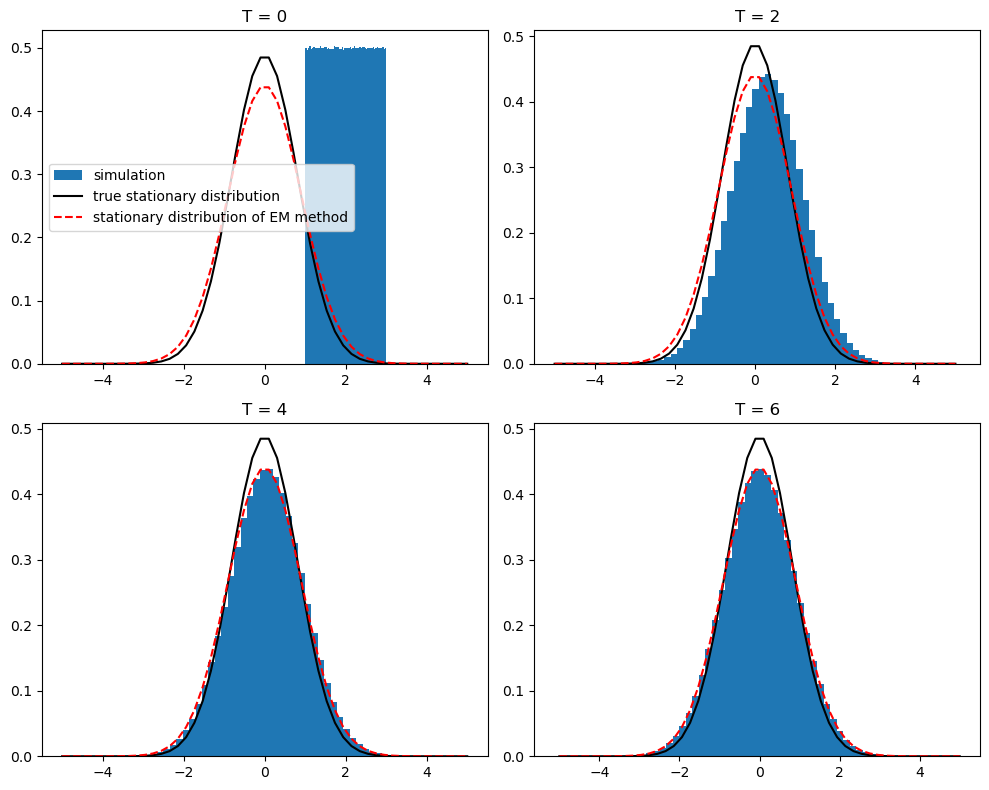

In [50]:
xvals = np.linspace(-5, 5)
A = sig**2/lam
A_modified = A/(1-lam*dt/2)
yvals = np.exp(-xvals**2/A)/np.sqrt(A*np.pi)
yvals_modified = np.exp(-xvals**2/A_modified)/np.sqrt(A_modified*np.pi)

plt.figure(figsize=(10,8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.title(f'T = {Tf_vals[i]}')
    plt.hist(X[:,i], bins = 60, density=True, label='simulation')
    plt.plot(xvals, yvals, color='k', label='true stationary distribution')
    plt.plot(xvals, yvals_modified, 'r--', label='stationary distribution of EM method')
    if i == 0:
        plt.legend()

plt.tight_layout()

In [34]:
X.max()

5.303803845420264